In [158]:
import pandas as pd
import numpy as np
import tsam.timeseriesaggregation as tsam

In [159]:
ts_in = pd.read_csv("time_series.csv", index_col=0, parse_dates=True)
ts_in = ts_in.drop(columns="ef_om")
ts_in

,el_spot_price,gas_price,co2_price,heat
Date,,,,
2019-01-01 00:00:00,28.32,24.134,22.95,156.96
2019-01-01 01:00:00,10.07,24.134,22.95,154.90
2019-01-01 02:00:00,-4.08,24.134,22.95,143.27
2019-01-01 03:00:00,-9.91,24.134,22.95,155.22
2019-01-01 04:00:00,-7.41,24.134,22.95,176.60
...,...,...,...,...
2019-12-31 19:00:00,46.00,16.077,24.59,201.51
2019-12-31 20:00:00,42.20,16.077,24.59,197.47
2019-12-31 21:00:00,39.74,16.077,24.59,195.18


In [160]:
aggregation = tsam.TimeSeriesAggregation(
    ts_in,
    noTypicalPeriods=8,
    hoursPerPeriod=438,
    segmentation=True,
    noSegments=438,
    representationMethod="distributionAndMinMaxRepresentation",
    distributionPeriodWise=False,
    clusterMethod='hierarchical'
)

In [161]:
result = aggregation.createTypicalPeriods()
result

c:\Users\witt_fa\.conda\envs\tsam-oemof\Lib\site-packages\tsam\timeseriesaggregation.py:1099: UserWarning: Something went wrong... At least one maximal value of the aggregated time series exceeds the maximal value the input time series for: ['el_spot_price']
  warnings.warn(


co2_price  el_spot_price  gas_price  \
  Segment Step Segment Duration                                        
0 0            1                     20.84      39.519604     22.070   
  1            1                     20.84      40.366268     22.070   
  2            1                     20.84      38.389607     22.070   
  3            1                     20.84      34.499619     22.070   
  4            1                     20.84      40.212935     22.070   
...                                    ...            ...        ...   
7 433          1                     27.11      32.306293     11.107   
  434          1                     27.11      32.459625     11.107   
  435          1                     27.11      33.416289     11.107   
  436          1                     27.11      34.299620     11.107   
  437          1                     27.11      42.022929     11.107   

                                       heat  
  Segment Step Segment Duration              
0 0            1                 223.958497  
  1            1                 223.061796  
  2            1                 220.711704  
  3            1                 227.775313  
  4            1                 229.358708  
...                                     ...  
7 433          1                  40.891358  
  434          1                  39.820882  
  435          1                  41.856664  
  436          1                  42.501421  
  437          1                  32.554366  

[3504 rows x 4 columns]

In [162]:
aggregation.accuracyIndicators()

c:\Users\witt_fa\.conda\envs\tsam-oemof\Lib\site-packages\tsam\timeseriesaggregation.py:1240: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  clustered_data_df = clustered_data_df.stack(level="TimeStep")


,RMSE,RMSE_duration,MAE
co2_price,0.069633,0.000000e+00,0.029671
el_spot_price,0.066240,6.356487e-04,0.046092
gas_price,0.075946,3.057776e-17,0.032224
heat,0.073276,1.001483e-03,0.054628


In [163]:
result.loc[4]

,,co2_price,el_spot_price,gas_price,heat
Segment Step,Segment Duration,,,,
0,1,24.57,55.869554,15.508,236.282311
1,1,24.57,56.512885,15.508,233.325529
2,1,24.57,55.672888,15.508,223.301805
3,1,24.57,54.919557,15.508,203.204355
4,1,24.57,53.826227,15.508,178.060041
...,...,...,...,...,...
433,1,24.59,56.676218,15.630,216.444871
434,1,24.59,53.936226,15.630,223.905162
435,1,24.59,53.919560,15.630,228.295333


In [164]:
matched_indices = aggregation.indexMatching()

matched_indices.loc[(matched_indices["PeriodNum"] == 7)]

,PeriodNum,TimeStep,SegmentIndex
Date,,,
2019-07-02 12:00:00,7,0,0
2019-07-02 13:00:00,7,1,1
2019-07-02 14:00:00,7,2,2
2019-07-02 15:00:00,7,3,3
2019-07-02 16:00:00,7,4,4
...,...,...,...
2019-08-26 01:00:00,7,433,433
2019-08-26 02:00:00,7,434,434
2019-08-26 03:00:00,7,435,435


In [165]:
result.index.names = ["period", "step", "duration"]
result.to_csv("time_series_aggregated.csv")


hours = [0] + np.cumsum(result.loc[0].index.get_level_values(level="duration").values).tolist()

start_time = pd.Timestamp('2023-01-01 00:00:00')
time_deltas = pd.to_timedelta(hours, unit='h')

date_times = start_time + time_deltas
date_time_index = pd.DatetimeIndex(date_times)
date_time_index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-01-18 21:00:00', '2023-01-18 22:00:00',
               '2023-01-18 23:00:00', '2023-01-19 00:00:00',
               '2023-01-19 01:00:00', '2023-01-19 02:00:00',
               '2023-01-19 03:00:00', '2023-01-19 04:00:00',
               '2023-01-19 05:00:00', '2023-01-19 06:00:00'],
              dtype='datetime64[ns]', length=439, freq=None)

In [166]:
from oemof import solph

In [167]:
es = solph.EnergySystem(
    timeindex=date_time_index, infer_last_interval=False
)

In [168]:
time_series_agg = result.loc[0].reset_index(drop=True)
time_series_agg

,co2_price,el_spot_price,gas_price,heat
0,20.84,39.519604,22.070,223.958497
1,20.84,40.366268,22.070,223.061796
2,20.84,38.389607,22.070,220.711704
3,20.84,34.499619,22.070,227.775313
4,20.84,40.212935,22.070,229.358708
...,...,...,...,...
433,22.95,30.599631,18.657,161.919411
434,22.95,28.189638,18.657,165.602888
435,22.95,28.026306,18.657,186.190358
436,22.95,29.022969,18.657,212.651390


In [169]:
b_gas = solph.Bus("gas bus")
b_electricity = solph.Bus("electricity bus")
b_heat = solph.Bus("heat bus")

source_gas = solph.components.Source(
    "gas grid import",
    outputs={b_gas: solph.Flow(variable_costs=time_series_agg["gas_price"] + time_series_agg["co2_price"])}
)
source_electricity = solph.components.Source(
    "electricity grid import",
    outputs={b_electricity: solph.Flow(variable_costs=time_series_agg["el_spot_price"])}
)
sink_heat = solph.components.Sink(
    "heat demand",
    inputs={b_heat: solph.Flow(fix=time_series_agg["heat"], nominal_value=1)}
)

heat_pump = solph.components.Converter(
    label="heat pump",
    inputs={b_electricity: solph.Flow()},
    outputs={b_heat: solph.Flow(nominal_value=100)},
    conversion_factors={b_heat: 3.5}
)
boiler = solph.components.Converter(
    label="gas boiler",
    inputs={b_gas: solph.Flow()},
    outputs={b_heat: solph.Flow(nominal_value=100)},
    conversion_factors={b_heat: 0.9}
)

heat_slack = solph.components.Source(
    label="heat slack",
    outputs={b_heat: solph.Flow(variable_costs=1000)}
)

storage = solph.components.GenericStorage(
    label="heat storage",
    inputs={b_heat: solph.Flow(nominal_value=50)},
    outputs={b_heat: solph.Flow(nominal_value=50)},
    nominal_storage_capacity=24 * 50,
    initial_storage_level=0.5,
    balanced=True
)

es.add(
    b_gas, b_electricity, b_heat,
    source_electricity, source_gas, sink_heat, heat_slack,
    heat_pump, boiler, storage
)

In [170]:
model = solph.Model(es)

_ = model.solve("gurobi")

results = solph.views.convert_keys_to_strings(model.results())

In [171]:
total_cost_el = np.sum((
    results["electricity grid import", "electricity bus"]["sequences"]["flow"].dropna().values
    * time_series_agg["el_spot_price"].values
))

total_cost_gas = np.sum((
    results["gas grid import", "gas bus"]["sequences"]["flow"].dropna().values
    * (time_series_agg["gas_price"].values + time_series_agg["co2_price"].values)
))

total_cost_slack = results["heat slack", "heat bus"]["sequences"]["flow"].sum() * 1000

total_heat_by_heat_pump = results["heat pump", "heat bus"]["sequences"]["flow"].sum()
total_heat_by_boiler = results["gas boiler", "heat bus"]["sequences"]["flow"].sum()
total_heat_by_slack = results["heat slack", "heat bus"]["sequences"]["flow"].sum()

In [172]:
# results["heat storage", "None"]["sequences"]["storage_content"]
# results["heat bus", "heat storage"]["sequences"]["flow"] - results["heat storage", "heat bus"]["sequences"]["flow"]

In [173]:
df = pd.DataFrame()

df["el_spot_price"] = time_series_agg["el_spot_price"].values
df["heat storage content"] = results["heat storage", "None"]["sequences"]["storage_content"].values[:-1]
df["storage charge"] = results["heat bus", "heat storage"]["sequences"]["flow"].values[:-1]
df["storage discharge"] = results["heat storage", "heat bus"]["sequences"]["flow"].values[:-1]
df

,el_spot_price,heat storage content,storage charge,storage discharge
0,39.519604,600.000000,0.0,23.958497
1,40.366268,576.041503,0.0,23.061796
2,38.389607,552.979707,0.0,20.711704
3,34.499619,532.268003,0.0,27.775313
4,40.212935,504.492690,0.0,29.358708
...,...,...,...,...
433,30.599631,818.178272,0.0,50.000000
434,28.189638,768.178272,0.0,50.000000
435,28.026306,718.178272,0.0,50.000000
436,29.022969,668.178272,0.0,50.000000


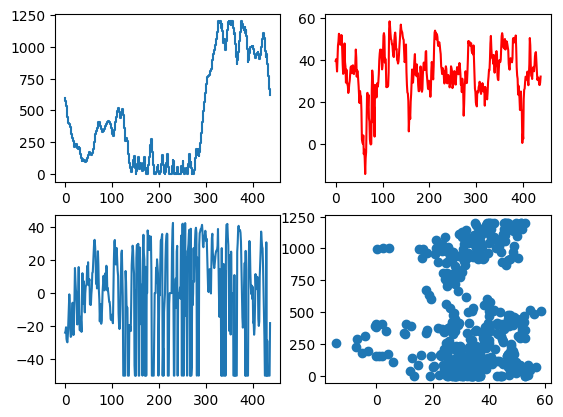

In [174]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

ax = ax.flatten()

ax[1].plot(df["el_spot_price"], c="red")
ax[0].step(df.index, df["heat storage content"])
ax[2].plot(df["storage charge"] - df["storage discharge"])
ax[3].scatter(df["el_spot_price"], df["heat storage content"])

In [175]:
from solph_model import build_and_run_dispatch_optimization, generate_date_time_index


results = {}

for i in result.index.get_level_values(0).unique():
    clustering = result.loc[i]
    date_time_index = generate_date_time_index(clustering)
    results[i] = build_and_run_dispatch_optimization(date_time_index, clustering.reset_index(drop=True))


In [176]:
def get_variable_from_period(results, period, key, variable):
    return results[period][key]["sequences"][variable].values[:-1]

In [177]:
def get_value_from_period_and_position(all_data, value, position):
    return all_data[value][position]

In [178]:
result_df = matched_indices.reset_index(drop=True).drop(columns="TimeStep")

variables = {
    ("heat storage", "None"): "storage_content",
    ("heat bus", "heat storage"): "flow",
    ("heat storage", "heat bus"): "flow",
    ("heat bus", "heat demand"): "flow",
    ("electricity grid import", "electricity bus"): "flow",
    ("gas grid import", "gas bus"): "flow",
}

for key in variables:
    results_by_period = {}
    for period_num in results:
        results_by_period[period_num] = get_variable_from_period(results, period_num, key, variables[key]).tolist()

    result_df[key] = [get_value_from_period_and_position(results_by_period, *a) for a in tuple(zip(result_df["PeriodNum"], result_df["SegmentIndex"]))]

<Axes: >

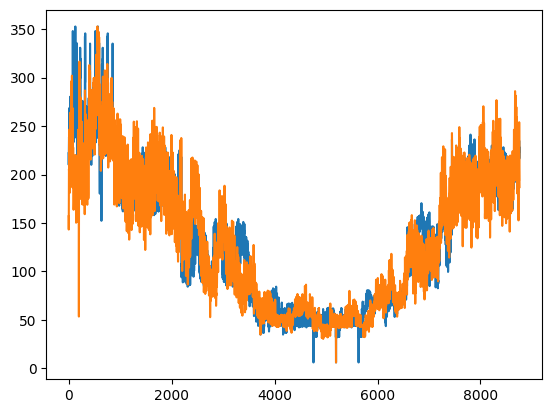

In [179]:
result_df[("heat bus", "heat demand")].plot.line()
ts_in.reset_index()["heat"].plot.line()